# 🗺️ Predicting India’s Population Density: A District-Wise ML Approach

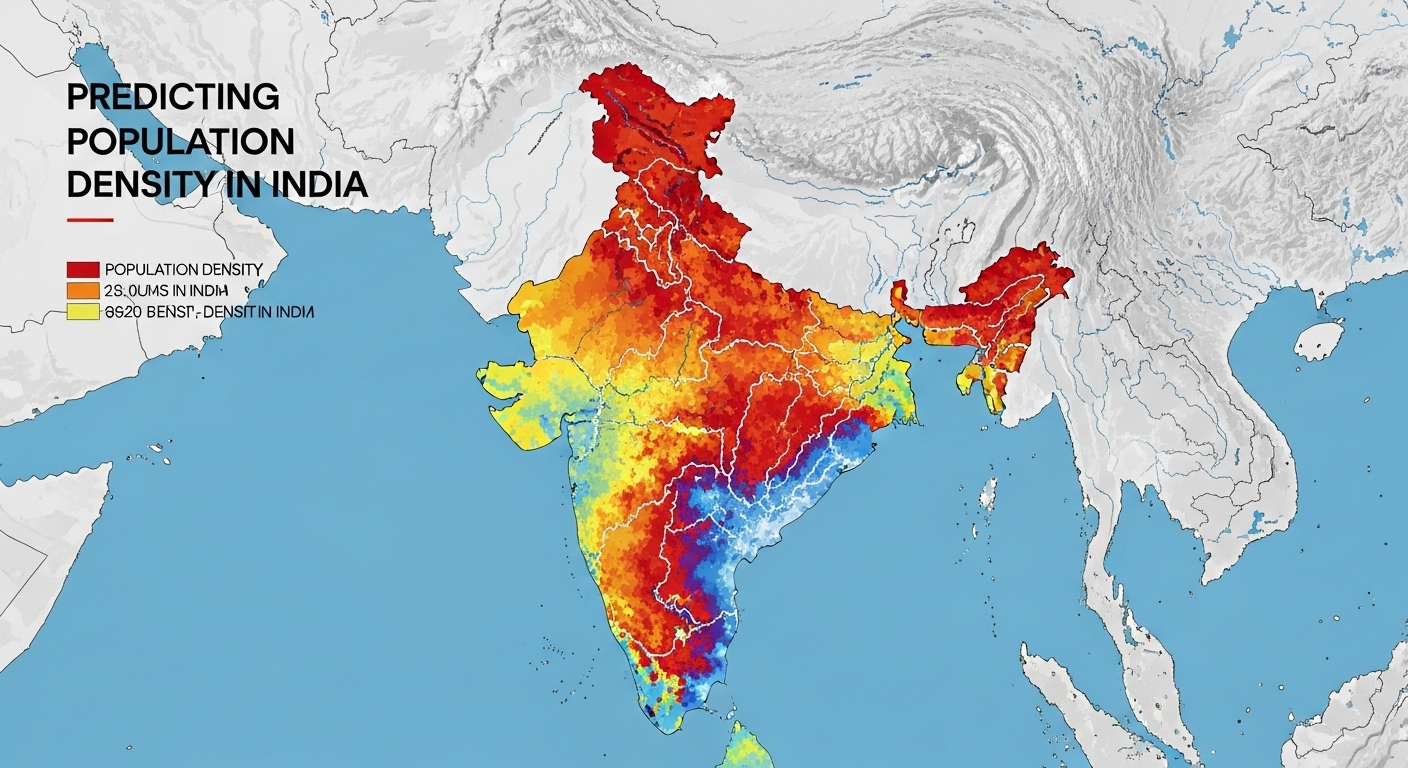

# About Authur
- Name: Muhammad Muneebullah

### Let's Connect:
Stay in touch for more awesome data stories and projects! 🚀  
You can find me on:

---

| 🔗 Platform | 🌐 Link |
|------------|---------|
| 👔 **LinkedIn** | [Visit my profile](https://www.linkedin.com/in/muneebullah-muneeb-241393337/) |
| 🧠 **Kaggle** | [Check out my notebooks](https://www.kaggle.com//muneebullahmuneeb) |
| 📧 **Email** | [Contact me in Email](muneebullahmuneeb63@gmail.com) |
| 🐙 **GitHub** | [Explore my repositories](https://github.com/muneebullah2332) |

---

# About Dataset:


| Column Name                          | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| District                             | The name of the district or area being described.                           |
| Geographical Area (Sq.Kms)           | The total area of the district measured in square kilometers.               |
| Population Density                   | The number of people living per square kilometer in the district.           |
| Male                                 | The total number of male residents in the district.                         |
| Female                               | The total number of female residents in the district.                       |
| Total                                | The total population of the district, including both males and females.     |
| Percentage Share to Total Population | The percentage of the district's population compared to the total population of the region or country. |
| Rank                                 | The position of the district based on a specific criterion, such as population or area size. |

# Aims:
The aims of this project are to:
- **Analyze** the relationship between population density and other demographic factors.
- **Predict** population density using machine learning models.
- **Visualize** the results to gain insights into population distribution across districts.
- **Identify** key features that influence population density.
- **Evaluate** model performance using metrics like R² score and Mean Absolute Error (MAE).
# Using Libraries:

- 📦 **numpy** for numerical operations  
- 🐼 **pandas** for data manipulation  
- 📊 **matplotlib** & **seaborn** for visualization  
- 📈 **plotly** for interactive plots  
- ⚠️ **warnings** to ignore warnings  
- 🤖 **scikit-learn** for machine learning models and preprocessing  
- 🌲 **xgboost** for advanced boosting algorithms


<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 1: Import Libraries
</div>



## 📚 Import the necessary libraries

- 📚 Here are the libraries we will use in this project:



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
import math
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor


<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 2: Load the Dataset
</div>


## 📥 Load the Dataset:

In [2]:
df = pd.read_csv("Area_population_Density_and_Population_2011_Census.csv")
df.head()

,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
0,Chikkodi,851,419,181619,174525,356144,7.45,6
1,Athani,1554,240,190310,182265,372575,7.80,5
2,Raibag,952,426,207142,198347,405489,8.48,2
3,Gokak,1146,348,200104,198288,398392,8.34,4
4,Hukkeri,987,405,200490,198780,399270,8.35,3


- Here we see our dataset, which contains information about the population density of various districts in India. The dataset includes columns for district names, geographical area, population density.Let's explore the dataset to understand its structure and contents.



<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 3: Understand the Dataset
</div>


## 🧐🔍 Understand our dataset:

- 📊🔍 Let's check the information about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   District                              228 non-null    object 
 1   Geograpical Area (Sq.Kms)             228 non-null    int64  
 2   Population Density                    228 non-null    int64  
 3   Male                                  228 non-null    int64  
 4   Female                                228 non-null    int64  
 5    Total                                228 non-null    int64  
 6   Percentage Share to Total Population  228 non-null    float64
 7   Rank                                  227 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 14.4+ KB


- Here we see there are two category columns and the six numerical columns in this dataset.

- 🧐🔍 Let's again check the data types of the dataset.

In [4]:
df.dtypes

District                                 object
Geograpical Area (Sq.Kms)                 int64
Population Density                        int64
Male                                      int64
Female                                    int64
 Total                                    int64
Percentage Share to Total Population    float64
Rank                                     object
dtype: object

- 📏🔢 Let's check the shape of the dataset to understand its dimensions and structure.

In [5]:
print('The number of rows in the dataset is:', df.shape[0], 'and the number of columns is:', df.shape[1])

The number of rows in the dataset is: 228 and the number of columns is: 8


- 📈 Let's check the statistical summary of the dataset to understand the distribution of numerical features.

In [6]:
df.describe()

,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population
count,228.000000,228.000000,2.280000e+02,2.280000e+02,2.280000e+02,228.000000
mean,1682.377193,326.399123,2.716373e+05,2.642863e+05,5.359237e+05,13.594474
std,12652.081507,378.260607,2.050760e+06,1.994551e+06,4.045298e+06,10.277710
min,123.000000,28.000000,1.803000e+04,1.756500e+04,3.564400e+04,1.930000
25%,538.500000,186.000000,6.679200e+04,6.818700e+04,1.343270e+05,7.435000
50%,797.500000,249.000000,1.027085e+05,1.022780e+05,2.064120e+05,10.440000
75%,1064.500000,352.500000,1.437400e+05,1.416150e+05,2.848725e+05,17.185000
max,191791.000000,5082.000000,3.096666e+07,3.012864e+07,6.109530e+07,100.000000


- 🗂️🔎 Let's check only columns of our dataset.

In [7]:
df.columns 

Index(['District', 'Geograpical Area (Sq.Kms)', 'Population Density', 'Male',
       'Female', ' Total', 'Percentage Share to Total Population', 'Rank'],
      dtype='object')

<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 4: Analyze our Dataset
</div>


## 📊🔍 Univariate Analysis:

- Here we will perform univariate analysis to understand the distribution of some features in the dataset.

- 🏙️🔎 Let's analyze our `District` column to see the number of unique values in district column.

In [8]:
print('The number of unique values in district column is: ',df['District'].nunique())

The number of unique values in district column is:  228


- Let's check the value counts of the `District` column to see how many districts are present in the dataset.

In [9]:
df['District'].value_counts()

District
Chikkodi         1
Athani           1
Raibag           1
Gokak            1
Hukkeri          1
                ..
Shorapur         1
Gurumithakala    1
Vadagera         1
Hunisigi         1
State Total      1
Name: count, Length: 228, dtype: int64

- Let's check the minimum and maximum values of the Geographical Area (Sq.Kms) column 🏞️📏 to understand the range of area sizes in the dataset.



In [10]:
print('The minimum value of Geographical Area (Sq.Kms) is:', df['Geograpical Area (Sq.Kms)'].min())
print('The maximum value of Geographical Area (Sq.Kms) is:', df['Geograpical Area (Sq.Kms)'].max())

The minimum value of Geographical Area (Sq.Kms) is: 123
The maximum value of Geographical Area (Sq.Kms) is: 191791


In [11]:
print('The Number of unique values in Geographical Area column is: ', df['Geograpical Area (Sq.Kms)'].nunique())

The Number of unique values in Geographical Area column is:  218


- 👨‍👦‍👦👩‍👧‍👧 Let's check the value counts of the `Male` and `Female` columns.

In [12]:
df['Male'].value_counts()

Male
63126       2
190310      1
181619      1
200104      1
200490      1
           ..
126942      1
71320       1
55044       1
81231       1
30966657    1
Name: count, Length: 227, dtype: int64

In [13]:
df['Female'].value_counts()

Female
174525      1
182265      1
198347      1
198288      1
198780      1
           ..
125391      1
71942       1
54708       1
78727       1
30128640    1
Name: count, Length: 228, dtype: int64

- 📊🌏 Let's explore the `Population Density` column.

- 📊➕ Let's check the sum of values in the `Population Density` column to understand the total population density across all districts. 🌏

In [14]:
df['Population Density'].value_counts().sum()

np.int64(228)

## 📊🔗 Bivariate Analysis:

- Here we will perform bivariate analysis to understand the relationship between two features in the dataset.

Let's make the correlation matrix 📊🧮 to understand the relationships between numerical features in the dataset.

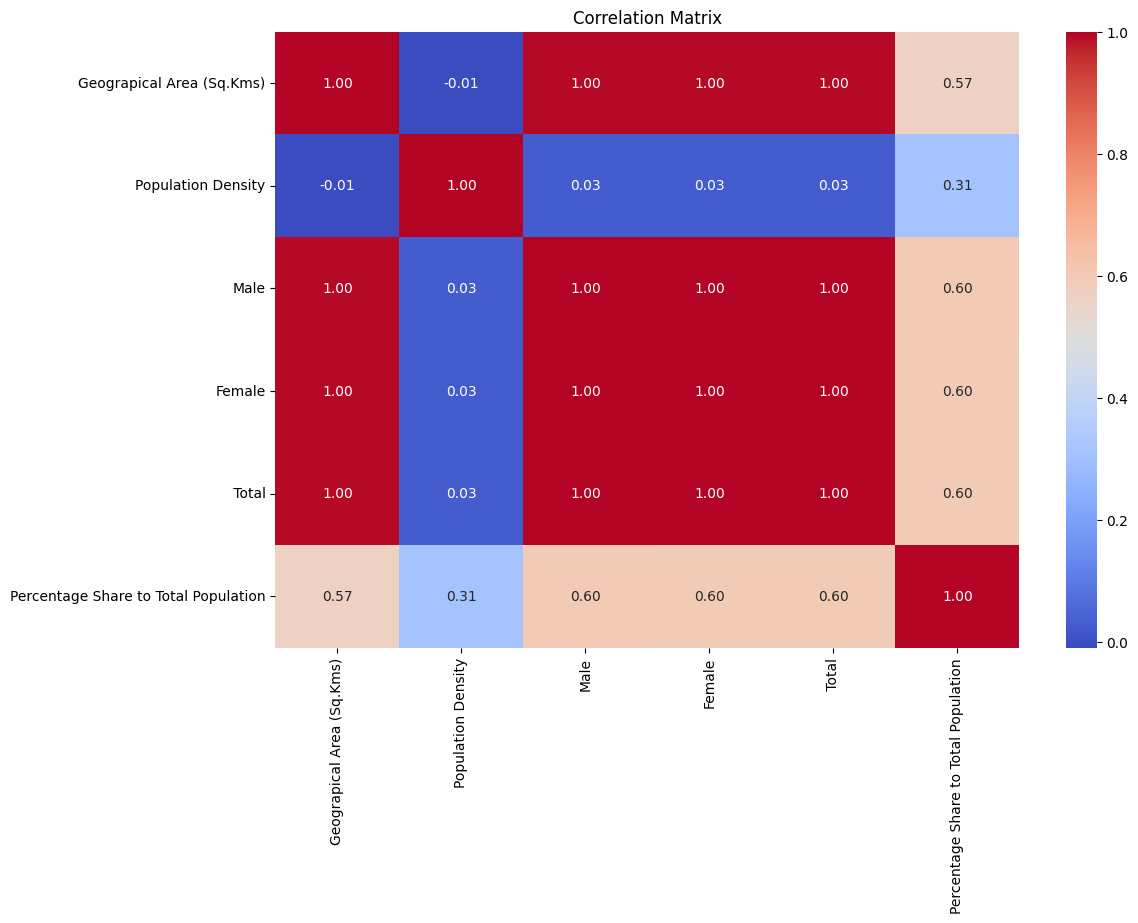

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

- Let's visualize the relationship between `Male` and `Population Density` using a scatter plot. 📈

<Axes: xlabel='Male', ylabel='Population Density'>

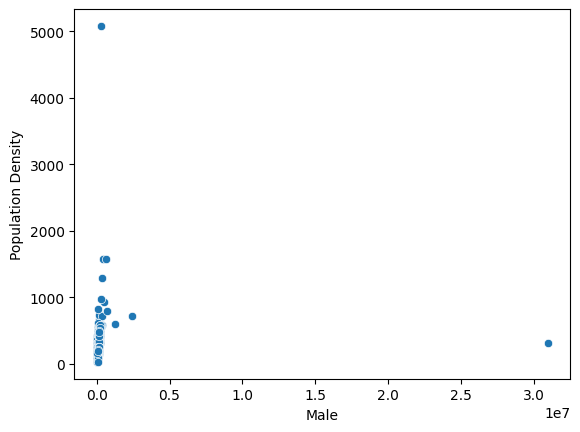

In [16]:
sns.scatterplot(x='Male', y='Population Density', data=df)

<Axes: xlabel='Female', ylabel='Population Density'>

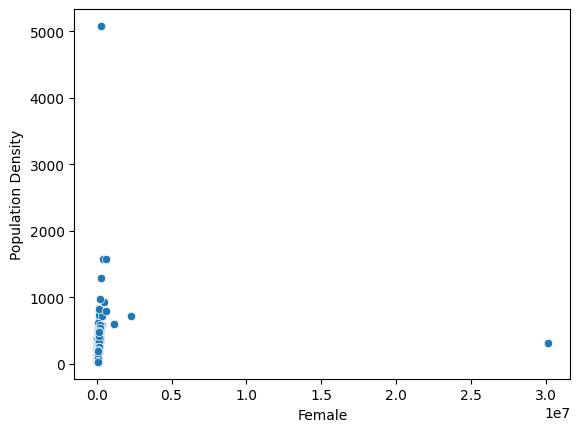

In [17]:
sns.scatterplot(x='Female', y='Population Density', data=df)

- Here we check the relationship between `Female` and `Population Density` using a scatter plot. 📈

- 📊🤝 Let's make the pairplot to visualize the relationships between all numerical features in the dataset. 🔍📈

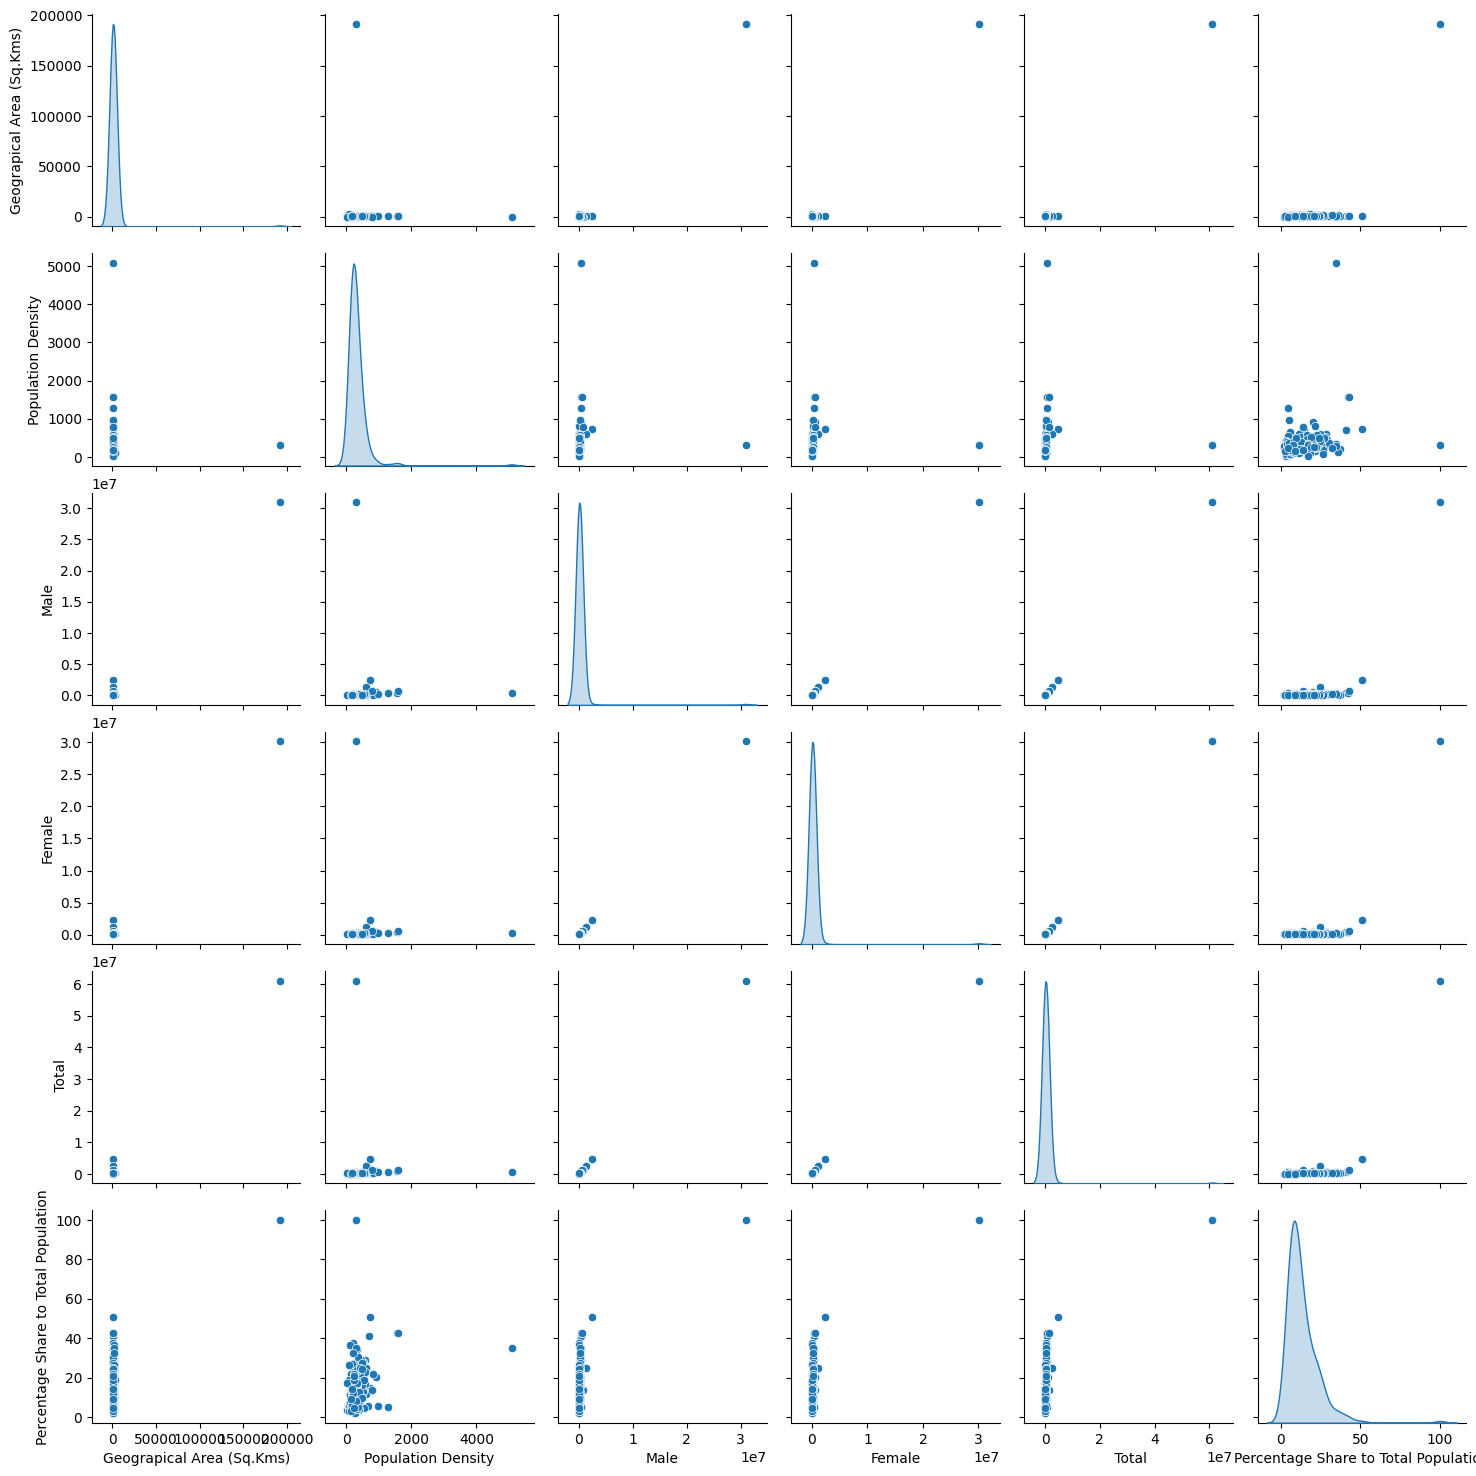

In [18]:
sns.pairplot(df, diag_kind='kde')

## 📊🔗 Multivariate Analysis:

- Here we will perform multivariate analysis to understand the relationships between multiple features in the dataset.

- 👨‍👦‍👦🔢 Let's check the value counts of the `Male` column to see how many districts have a certain number.

In [19]:
df.groupby('Male')['District'].count().sort_values(ascending=False).head(10)

Male
63126    2
18079    1
18030    1
22604    1
26167    1
28078    1
32449    1
33387    1
37540    1
39813    1
Name: District, dtype: int64

- 🌏🔢 Now, we check counts of the `Population Density` column to see how many districts have a certain value.

In [20]:
df.groupby('Population Density')['District'].count().sort_values(ascending=False).head(10)

Population Density
188    4
168    4
226    4
163    3
206    3
177    3
231    3
249    3
307    3
186    2
Name: District, dtype: int64

- Let's make the 3d scatter plot to visualize the relationship between `Male`, `Female`, and `Population Density`. 📊🌐

In [21]:
fig = px.scatter_3d(data_frame=df, x = 'Male', y = 'Female', z = 'Population Density', color = 'District')
fig.show()

- Here we see the scatter 3d plot between `Male`, `Female`, and `Population Density`. 📊🌐. And here we again realize there are some outliers in the data. 🤔.we will remove this outliers after the analysis.

- Let's make the parallel coordinates plot to visualize the relationships between `Male`, `Female`, and `Population Density`. 📊🌐

In [22]:
x = 'Male'
y = 'Female'
z = 'Population Density'
fig = px.parallel_coordinates(data_frame=df, dimensions=[x, y, z], color=x)
fig.show()

- Here we see the parallel coordinates plot between `Male`, `Female`, and `Population Density`. 📊🌐. 

<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 5: Handle missing values
</div>

## 🧹🔎 Handle Missing Values:

- Let's handle missing values in the dataset. We will check for any missing values in the dataset and handle them appropriately.

In [23]:
df.isnull().sum()

District                                0
Geograpical Area (Sq.Kms)               0
Population Density                      0
Male                                    0
Female                                  0
 Total                                  0
Percentage Share to Total Population    0
Rank                                    1
dtype: int64

- Here we see there are only one column `Rank` 🏅 has missing values in the dataset. ⚠️

In [24]:
df.isnull().sum() * 100 / len(df)

District                                0.000000
Geograpical Area (Sq.Kms)               0.000000
Population Density                      0.000000
Male                                    0.000000
Female                                  0.000000
 Total                                  0.000000
Percentage Share to Total Population    0.000000
Rank                                    0.438596
dtype: float64

- Let's impute this missing value with the mode of the `Rank` column.

In [25]:
df['Rank'].fillna(df['Rank'].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

District                                0
Geograpical Area (Sq.Kms)               0
Population Density                      0
Male                                    0
Female                                  0
 Total                                  0
Percentage Share to Total Population    0
Rank                                    0
dtype: int64

- Now we check again for missing values in the dataset.and we see there are no missing values in the dataset. ✅

- Let's check for duplicate rows in the dataset to ensure data integrity. 🧐🔍🧹

In [27]:
df.duplicated().sum()

np.int64(0)

- Here we see there is no duplicates in the dataset. ✅It is good for us.

Now we visualize the missing values in the dataset using a heatmap. 📊🔍

<Axes: >

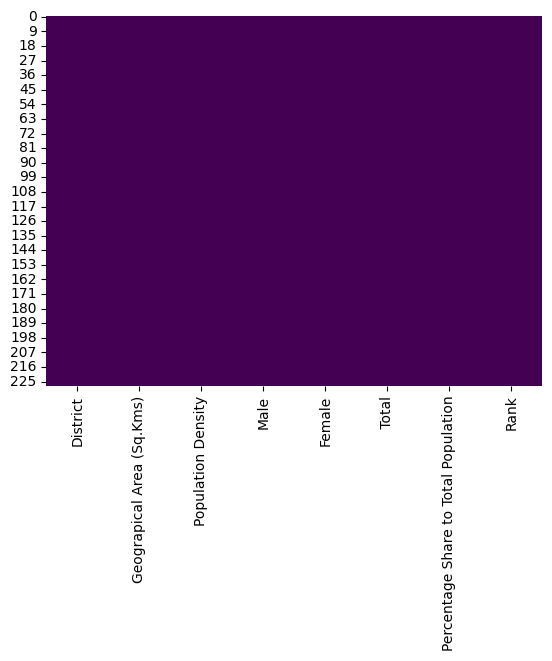

In [28]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 6: Deal with the Outliers
</div>

## Handles Outliers: 🚨📉


- Let's first we visualize the outliers in the dataset using box plots. 📊🔍

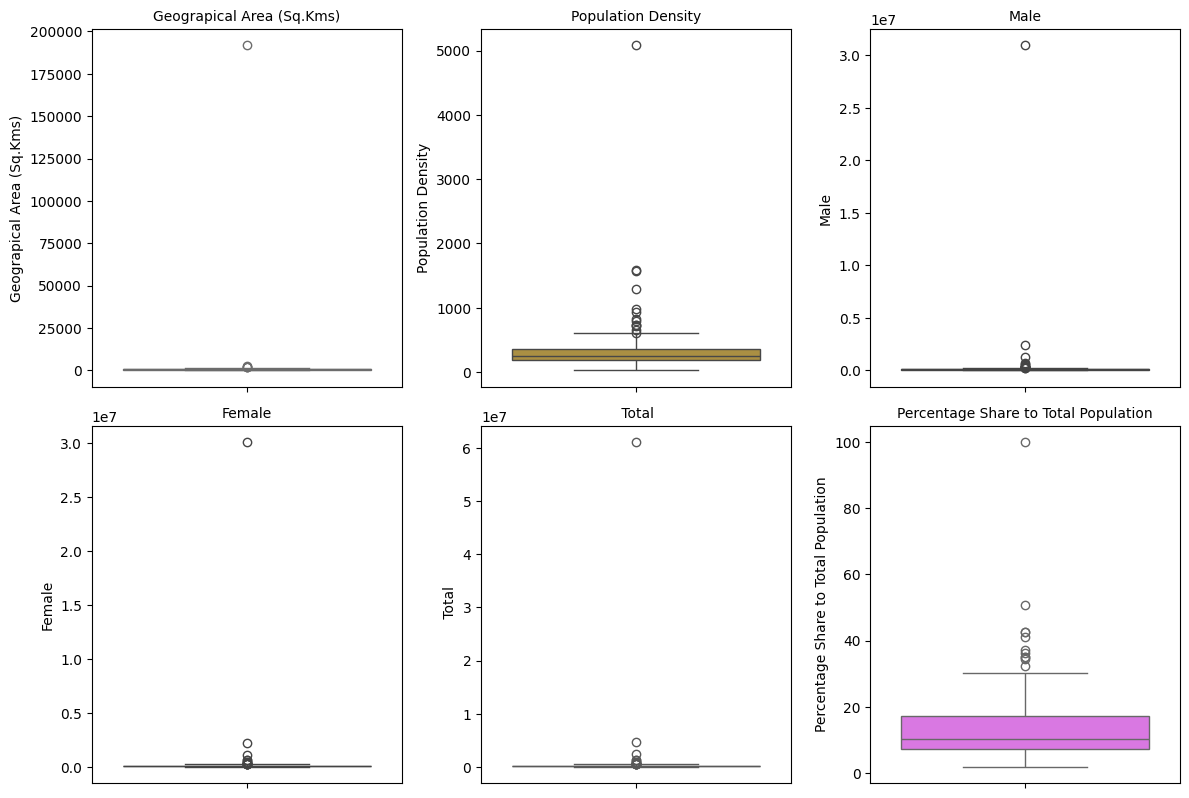

In [29]:
 #Plot all numeric columns in one big square plot with different colors for each box plot
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
colors = sns.color_palette("husl", len(numeric_columns))  # Generate a color palette

plt.figure(figsize=(12, 12))  # Set the figure size
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(int(len(numeric_columns)**0.5) + 1, int(len(numeric_columns)**0.5) + 1, i)
    sns.boxplot(y=df[col], color=colors[i - 1])
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.show()

**"Boxplots were used to inspect the numerical features for potential outliers. Although a few values fall outside the IQR range, they were not removed because they appear to be valid extreme cases rather than data errors. Not all outliers negatively impact the model—some represent real-world variability and can carry important signals for prediction."**

<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 7: Check the Normalization of our dataset.
</div>

## 📊✨ Let's check the Normalization of our dataset. 🚦🔍

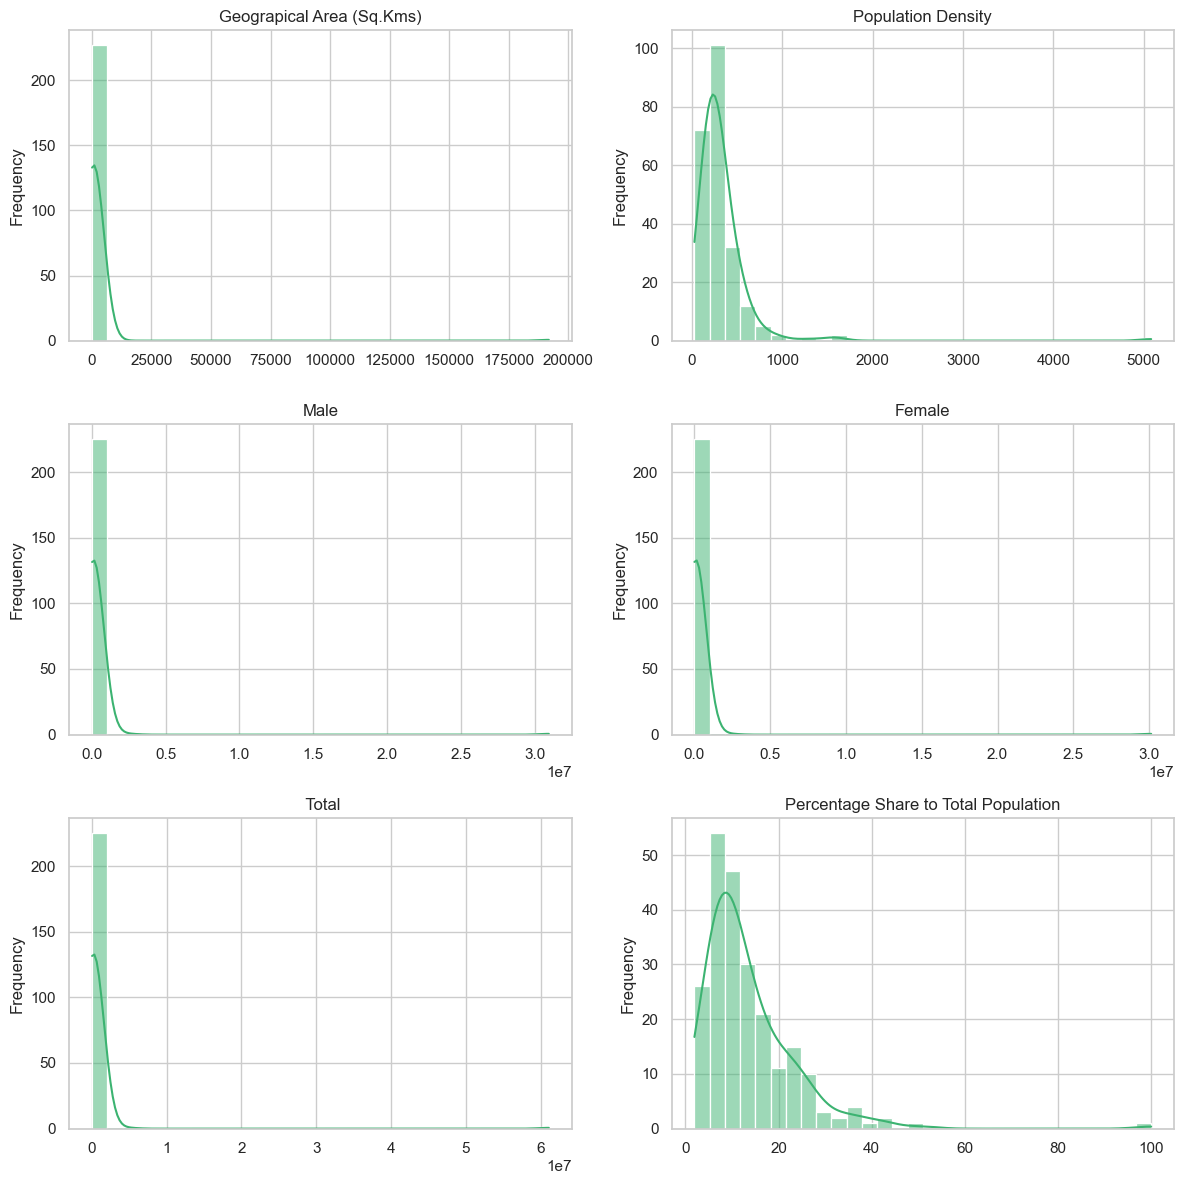

In [30]:

numerical_columns = df.select_dtypes(include='number').columns

# Count of numerical columns
num_cols = len(numerical_columns)

# Define subplot layout (rows and columns)
cols = 2  # number of columns in subplot grid
rows = math.ceil(num_cols / cols)

# Set plot size
plt.figure(figsize=(cols * 6, rows * 4))
sns.set(style="whitegrid")

# Loop over numerical columns and plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Here wee see our dataset is right skewed. 📈so we remove the skewness using log 1p.

In [31]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply log1p to all numerical columns using loop
for col in numerical_cols:
    df[col] = np.log1p(df[col])


- Here we will again visualize all numerical columns in the dataset to check the skewness after applying log1p transformation. 📊🔍

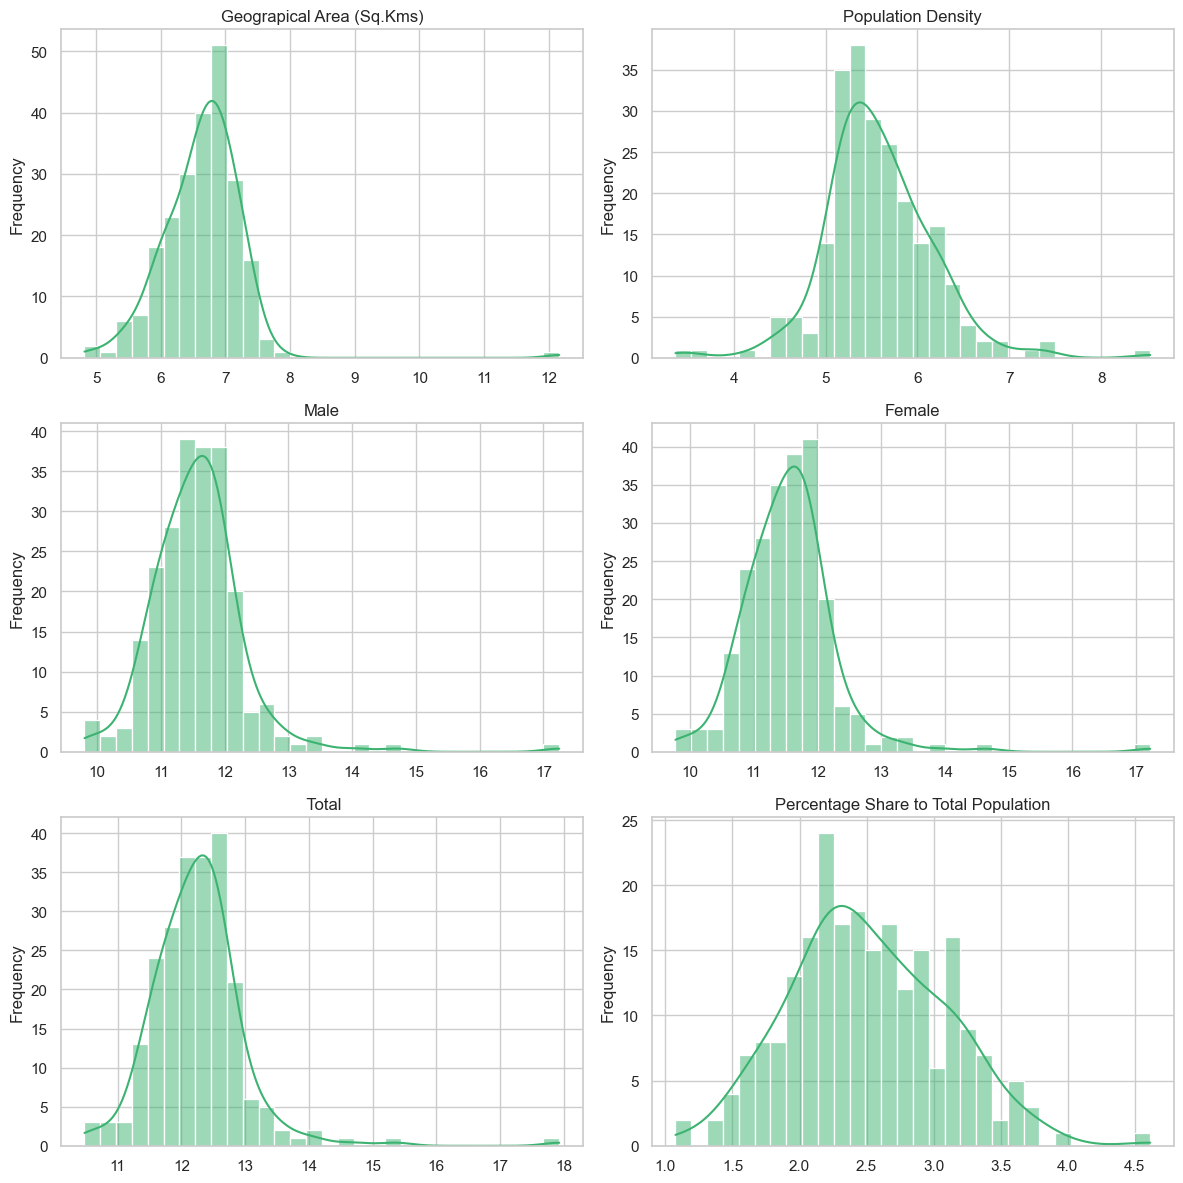

In [32]:

numerical_columns = df.select_dtypes(include='number').columns

# Count of numerical columns
num_cols = len(numerical_columns)

# Define subplot layout (rows and columns)
cols = 2  # number of columns in subplot grid
rows = math.ceil(num_cols / cols)

# Set plot size
plt.figure(figsize=(cols * 6, rows * 4))
sns.set(style="whitegrid")

# Loop over numerical columns and plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Here we our numeric columns are almost normalized beacuse we have already removed the outliers from the dataset. 📊✨

<div style="background-color: #e0d4fd; border-radius: 12px; padding: 20px; border: 2px solid #c2a9fa; color: #4b0082; font-weight: bold; font-size: 20px; text-align: center; width: 60%; margin: auto; font-family: 'Times New Roman', Times, serif;">
  Step 7: Machine Learning
</div>

## Let's start with the machine learning part of our project. 🤖📈

- First we convert the `District` column to numerical values using label encoding. This is necessary for machine learning algorithms that require numerical input.

In [33]:
df.head()

,District,Geograpical Area (Sq.Kms),Population Density,Male,Female,Total,Percentage Share to Total Population,Rank
0,Chikkodi,6.747587,6.040255,12.109672,12.069829,12.783093,2.134166,6
1,Athani,7.349231,5.484797,12.156415,12.113222,12.828196,2.174752,5
2,Raibag,6.859615,6.056784,12.241165,12.197778,12.912851,2.249184,2
3,Gokak,7.044905,5.855072,12.206598,12.197481,12.895194,2.234306,4
4,Hukkeri,6.895683,6.006353,12.208525,12.199959,12.897396,2.235376,3


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['District'] = le.fit_transform(df[['District']])
df['Rank'] = le.fit_transform(df[['Rank']])

- ✂️📊 Let's split the dataset into features (X) and target variable (y). The target variable is `Population Density`, and the features are all other columns except `Population Density`.

In [35]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Population Density'], axis=1)
y = df['Population Density']
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:


models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
            "positive": [True, False]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, objective='reg:squarederror'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.1, 0.01]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.1, 0.05],
            "max_depth": [3, 5]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance'],
            "p": [1, 2]  # Manhattan (1) & Euclidean (2)
        }
    }
}

results = []

for name, m in models.items():
    print(f"🔍 Tuning: {name}")
    grid = GridSearchCV(m["model"], m["params"], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "MSE": mse,
        "R2 Score": r2,
        "MAE": mae
    })

df_results = pd.DataFrame(results)
print("\n📋 Final Model Comparison:")
print(df_results.sort_values(by="R2 Score", ascending=False))
 


🔍 Tuning: LinearRegression
🔍 Tuning: RandomForest
🔍 Tuning: XGBoost
🔍 Tuning: GradientBoosting
🔍 Tuning: DecisionTree
🔍 Tuning: KNN

📋 Final Model Comparison:
              Model                                        Best Params  \
0  LinearRegression        {'fit_intercept': False, 'positive': False}   
3  GradientBoosting  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...   
1      RandomForest  {'max_depth': 10, 'min_samples_split': 5, 'n_e...   
2           XGBoost  {'learning_rate': 0.01, 'max_depth': 6, 'n_est...   
4      DecisionTree  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   
5               KNN  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   

        MSE  R2 Score       MAE  
0  0.031233  0.905473  0.121344  
3  0.033439  0.898796  0.130577  
1  0.053720  0.837416  0.139224  
2  0.083341  0.747768  0.174797  
4  0.157415  0.523580  0.238453  
5  0.325795  0.013975  0.413310  


- Here we see our best model is `Linear Regression` with `R2 Score` of `0.90` and `MAE` of `0.12`. 📈

In [37]:
final_model = LinearRegression(fit_intercept=False, positive=False)
final_model.fit(X_train, y_train)


LinearRegression(fit_intercept=False)

- Let's visualize our final model's predictions against the actual values of `Population Density`. 📊

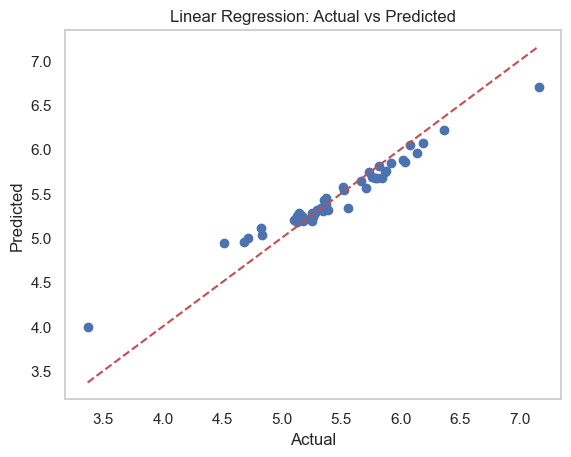

In [38]:
import matplotlib.pyplot as plt

y_pred = final_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()
